# Numerical Computing in Python

(C) 2016 [Steve Phelps](http://sphelps.net)

_Modifications to convert to Python 3, Rebecca Lowdon (Feb 2019)._

# Overview

- Floating-point representation
- Arrays and Matrices with `numpy`
- Basic plotting with `matplotlib`
- Pseudo-random variates with `numpy.random`

# Representing continuous values

- Digital computers are inherently *discrete*.

- Real numbers $x \in R$ cannot always be represented exactly in a digital computer.

- They are stored in a format called *floating-point*.

- [IEEE Standard 754](http://steve.hollasch.net/cgindex/coding/ieeefloat.html) specifies a universal format across different implementations.  
    - As always there are deviations from the standard.
    
- There are two standard sizes of floating-point numbers: 32-bit and 64-bit.

- 64-bit numbers are called *double precision*, are sometimes called *double* values.

- IEEE floating-point calculations are performed in *hardware* on modern computers. 

- How can we represent aribitrary real values using only 32 bits?
   

# Fixed-point verses floating-point

* **CoderGirl**: Please read through the first three sections of this [primer on floating point numbers](http://steve.hollasch.net/cgindex/coding/ieeefloat.html). 
    - What Are Floating Point Numbers?
    - Storage Layout
    - Ranges of Floating-Point Number

# Scientific Notation

- Humans also use a form of floating-point representation.

- In [Scientific notation](https://en.wikipedia.org/wiki/Scientific_notation), all numbers are written
in the form $m \times 10^n$.

- When represented in ASCII, we abbreviate this `<m>e<n>`, for example `6.72e+11` = $6.72 \times 10^{11}$.

- The integer $m$ is called the *significand* or *mantissa*. 

- The integer $n$ is called the *exponent*.

- The integer $10$ is the *base*.


# Scientific Notation in Python

- Use `format()` to implement Scientific notation for floating-point numbers:


In [21]:
print('{:.2e}'.format(672000000000.0))

6.72e+11


- Note that internally, the value is not *represented* exactly like this.  

- Scientific notation is a convention for writing or rendering numbers, *not* representing them digitally. 

# Effective floating-point range

| Format | Binary | Decimal |
| ------ | ------ | ------- |
| single | $\pm (2-2^{-23}) \times 2^{127}$ | $\approx \pm 10^{38.53}$ |
| double | $\pm (2-2^{-52}) \times 2^{1023}$ | $\approx \pm 10^{308.25}$ |

    

# 

# Representing Zero

- Zero cannot be represented straightforwardly because we assume that all mantissa values start with the digit 1.

- Zero is stored as a special-case, by setting mantissa *and* exponent both to zero.

- The sign-bit can either be set or unset, so there are distinct positive and negative representations of zero.


# Zero in Python

In [22]:
x = +0.0
x

0.0

In [23]:
y = -0.0
y

-0.0

- However, these are considered equal:

In [24]:
x == y

True

# Infinity

- Positive overflow results in a special value of infinity (in Python `inf`).

- This is stored with an exponent consiting of all 1s, and a mantissa of all 0s.

- The sign-bit allows us to differentiate between negative and positive overflow: $-\infty$ and $+\infty$.

- This allows us to carry on calculating past an overflow event.

# Infinity in Python

In [25]:
x = 1e300 * 1e100
x

inf

In [26]:
x = x + 1
x

inf

# Negative infinity in Python

In [27]:
x > 0

True

In [28]:
y = -x
y

-inf

In [29]:
y < x

True

# Not A Number (NaN)

- Some mathematical operations on real numbers do not map onto real numbers.

- These results are represented using the special value to `NaN` which represents "not a (real) number".

- `NaN` is represented by an exponent of all 1s, and a non-zero mantissa.


# `NaN` in Python



In [30]:
from numpy import sqrt, inf, isnan, nan
x = sqrt(-1)
x

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


nan

In [31]:
y = inf - inf
y

nan

# Comparing `nan` values in Python

- Beware of comparing `nan` values

In [32]:
x == y

False

- To test whether a value is `nan` use the `isnan` function:

In [33]:
isnan(x)

True

# `NaN` is not the same as `None`

- `None` represents a *missing* value.

- `NaN` represents an *invalid* floating-point value.

- These are fundamentally different entities:
    

In [34]:
nan is None

False

In [35]:
isnan(None)

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

# Numerical Methods

- In e.g. simulation models or quantiative analysis we typically repeatedly update numerical values inside long loops.

- Programs such as these implement *numerical algorithms*.

- It is very easy to introduce bugs into code like this.



# Numerical stability

- The round-off error associated with a result can be compounded in a loop.

- If the error increases as we go round the loop, we say the algorithm is
numerically *unstable*.

- Mathematicians design numerically stable algorithms using [numerical analysis](https://en.wikipedia.org/wiki/Numerical_analysis).



# Catastrophic Cancellation

- Suppose we have two real values $x$ and $y = x + \epsilon$.

- $\epsilon$ is very small and $x$ is very large.

- $x$ has an _exact_ floating point representation

- However, because of lack of precision $x$ and $y$ have the same floating
point representation.

  - i.e. they are represented as the same sequence of 64-bits


  
# Relative and absolute error

- The absolute error $r = x - y = (x + \epsilon) - x$.

- The relative error is $R = r/x = (x + \epsilon)/x - 1 = \epsilon/x$.

- So the relative error is tiny because $x$ is large relative to $\epsilon$.

- Ok, but how about the error in computing the _difference_ between these values.

- If we perform this in floating-point we will get 0.

- The correct value is $(x + \epsilon) - x = \epsilon$.

- The relative error is infinite!


# Catastrophic Cancellation in Python


In [ ]:
x = 3.141592653589793
x

In [ ]:
y = 6.022e23
x = (x + y) - y

In [ ]:
x


- Avoid subtracting two nearly-equal numbers.

- Especially in a loop!

- Better-yet use a well-validated existing implementation in the form of a numerical library.


# Importing numpy


- Functions for numerical computiing are provided by a separate _module_ called [`numpy`](http://www.numpy.org/).  

- Before we use the numpy module we must import it.

- By convention, we import `numpy` using the alias `np`.

- Once we have done this we can prefix the functions in the numpy library using the prefix `np.`

In [ ]:
import numpy as np

- We can now use the functions defined in this package by prefixing them with `np`.  


# Arrays

- Arrays represent a collection of values.

- In contrast to lists:
    - arrays typically have a *fixed length*
        - they can be resized, but this involves an expensive copying process.
    - and all values in the array are of the *same type*.
        - typically we store floating-point values.

- Like lists:
    - arrays are *mutable*;
    - we can change the elements of an existing array.


# Arrays in `numpy`

    
- Arrays are provided by the `numpy` module.

- The function `array()` creates an array given a list.

In [ ]:
import numpy as np
x = np.array([0, 1, 2, 3, 4])
x

# Array indexing

- We can index an array just like a list

In [ ]:
x[4]

In [ ]:
x[4] = 2
x

# Arrays are not lists

- Although this looks a bit like a list of numbers, it is a fundamentally different type of value:

In [ ]:
type(x)

- For example, we cannot append to the array:

In [ ]:
x.append(5)

# Functions over arrays

- When we use arithmetic operators on arrays, we create a new array with the result of applying the operator to each element.

In [ ]:
y = x * 2
y

- The same goes for numerical functions:

In [ ]:
x = np.array([-1, 2, 3, -4])
y = abs(x)
y

# Vectorized functions

- Note that not every function automatically works with arrays.

- Functions that have been written to work with arrays of numbers are called *vectorized* functions.

- Most of the functions in `numpy` are already vectorized.

- You can create a vectorized version of any other function using the higher-order function `numpy.vectorize()`.

# `vectorize` example

In [ ]:
def myfunc(x):
    if x >= 0.5:
        return x
    else:
        return 0.0
    
fv = np.vectorize(myfunc)

In [ ]:
x = np.arange(0, 1, 0.1)
x

In [ ]:
fv(x)

# Populating Arrays

- To populate an array with a range of values we use the `np.arange()` function:


In [36]:
x = np.arange(0, 10)
print(x)

[0 1 2 3 4 5 6 7 8 9]


- We can also use floating point increments.


In [37]:
x = np.arange(0, 1, 0.1)
print(x)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]


# Basic Plotting

- We will use a module called `matplotlib` to plot some simple graphs.

- This module has a nested module called `pyplot`.

- By convention we import this with the alias `plt`.

- This module provides functions which are very similar to [MATLAB plotting commands](http://uk.mathworks.com/help/matlab/ref/plot.html).


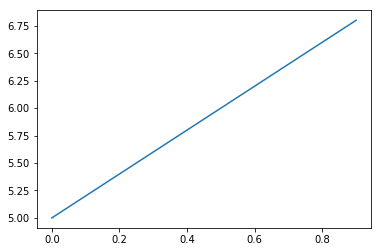

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

y = x*2 + 5
plt.plot(x, y)


# Plotting a sine curve

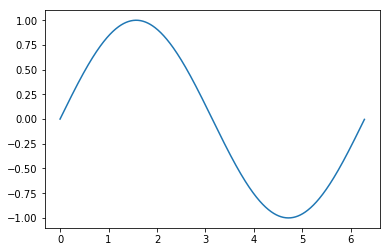

In [39]:
from numpy import pi, sin

x = np.arange(0, 2*pi, 0.01)
y = sin(x)
plt.plot(x, y)

# Multi-dimensional data

- Numpy arrays can hold multi-dimensional data.

- To create a multi-dimensional array, we can pass a list of lists to the `array()` function:

In [40]:
import numpy as np

x = np.array([[1,2], [3,4]])
x

array([[1, 2],
       [3, 4]])

# Arrays containing arrays

- A multi-dimensional array is an array of an arrays.

- The outer array holds the rows.

- Each row is itself an array:

In [41]:
x[0]

array([1, 2])

In [42]:
x[1]

array([3, 4])

- So the element in the second row, and first column is:

In [43]:
x[1][0]

3

# Matrices

- We can create a matrix from a multi-dimensional array.

In [44]:
M = np.matrix(x)
M

matrix([[1, 2],
        [3, 4]])

# Plotting multi-dimensional with matrices

- If we supply a matrix to `plot()` then it will plot the y-values taken from the *columns* of the matrix (notice the transpose in the example below).

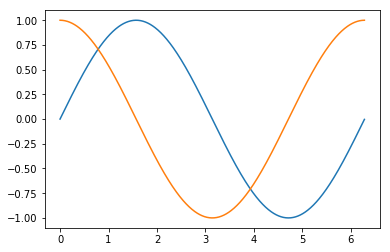

In [45]:
from numpy import pi, sin, cos

x = np.arange(0, 2*pi, 0.01)
y = sin(x)
ax = plt.plot(x, np.matrix([sin(x), cos(x)]).T)

# Performance 

- When we use `numpy` matrices in Python the corresponding functions are linked with libraries written in C and FORTRAN.

- For example, see the [BLAS (Basic Linear Algebra Subprograms) library](http://www.netlib.org/blas/).

- These libraries are very fast, and can be configured so that operations are performed in parallel on multiple CPU cores, or GPU hardware.


# Matrix Operators

- Once we have a matrix, we can perform matrix computations.

- To compute the [transpose](http://mathworld.wolfram.com/MatrixTranspose.html) and [inverse](http://mathworld.wolfram.com/MatrixInverse.html) use the `T` and `I` attributes:

To compute the transpose $M^{T}$

In [46]:
M.T


matrix([[1, 3],
        [2, 4]])

To compute the inverse $M^{-1}$

In [47]:
M.I

matrix([[-2. ,  1. ],
        [ 1.5, -0.5]])

# Matrix Dimensions

- The total number of elements, and the dimensions of the array:

In [48]:
M.size

4

In [49]:
M.shape

(2, 2)

In [50]:
len(M.shape)

2

# Creating Matrices from strings

- We can also create arrays directly from strings, which saves some typing:

In [51]:
I2 = np.matrix('2 0; 0 2')
I2

matrix([[2, 0],
        [0, 2]])

- The semicolon starts a new row.

# Matrix Multiplication

Now that we have two matrices, we can perform [matrix multiplication](https://en.wikipedia.org/wiki/Matrix_multiplication):

In [52]:
M * I2

matrix([[2, 4],
        [6, 8]])

# Matrix Indexing


- We can [index and slice matrices](http://docs.scipy.org/doc/numpy/user/basics.indexing.html) using the same syntax as lists.

In [53]:
M[:,1]

matrix([[2],
        [4]])

# Slices are references

- If we use this is an assignment, we create a *reference* to the sliced elements, *not* a copy.

In [54]:
V = M[:,1]  # This does not make a copy of the elements!
V

matrix([[2],
        [4]])

In [55]:
M[0,1] = -2
V

matrix([[-2],
        [ 4]])

# Copying matrices and vectors

- To copy a matrix, or a slice of its elements, use the function `np.copy()`:



In [56]:
M = np.matrix('1 2; 3 4')
V = np.copy(M[:,1])  # This does copy the elements.
V

array([[2],
       [4]])

In [57]:
M[0,1] = -2
V

array([[2],
       [4]])

# Sums

One way we _could_ sum a vector or matrix is to use a `for` loop.

In [58]:
vector = np.arange(0.0, 100.0, 10.0)
vector


array([ 0., 10., 20., 30., 40., 50., 60., 70., 80., 90.])

In [59]:
result = 0.0
for x in vector:
    result = result + x
result

450.0

- This is not the most _efficient_ way to compute a sum.

# Efficient sums

- Instead of using a `for` loop, we can use a numpy function `sum()`.

- This function is written in the C language, and is very fast.


In [60]:
vector = np.array([0, 1, 2, 3, 4])
print(np.sum(vector))

10


# Summing rows and columns

- When dealing with multi-dimensional data, the 'sum()' function has a named-argument `axis` which allows us to specify whether to sum along, each rows or columns.


In [61]:
matrix = np.matrix('1 2 3; 4 5 6; 7 8 9')
print(matrix)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


- To sum along rows:

In [62]:
np.sum(matrix, axis=0)

matrix([[12, 15, 18]])

- To sum along columns:

In [63]:
np.sum(matrix, axis=1)

matrix([[ 6],
        [15],
        [24]])

# Cumulative sums

- Suppose we want to compute $y_n = \sum_{i=1}^{n} x_i$ where $\mathbf{x}$ is a vector.


In [64]:
import numpy as np
x = np.array([0, 1, 2, 3, 4])
y = np.cumsum(x)
print(y)

[ 0  1  3  6 10]


# Cumulative sums along rows and columns


In [65]:
x = np.matrix('1 2 3; 4 5 6; 7 8 9')
print(x)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [66]:
y = np.cumsum(x)
np.cumsum(x, axis=0)

matrix([[ 1,  2,  3],
        [ 5,  7,  9],
        [12, 15, 18]])

In [67]:
np.cumsum(x, axis=1)

matrix([[ 1,  3,  6],
        [ 4,  9, 15],
        [ 7, 15, 24]])

# Cumulative products

- Similarly we can compute $y_n = \Pi_{i=1}^{n} x_i$ using `cumprod()`:


In [68]:
import numpy as np
x = np.array([1, 2, 3, 4, 5])
np.cumprod(x)

array([  1,   2,   6,  24, 120])

- We can compute cummulative products along rows and columns using the `axis` parameter, just as with the `cumsum()` example.

# Generating (pseudo) random numbers

- The nested module `numpy.random` contains functions for generating random numbers from different probability distributions.


In [69]:
from numpy.random import normal, uniform, exponential, randint

- Suppose that we have a random variable $\epsilon \sim N(0, 1)$.

- In Python we can draw from this distribution like so:

In [70]:
epsilon = normal()
print(epsilon)

0.5855139762039016


- If we execute another call to the function, we will make a _new_ draw from the distribution:

In [71]:
epsilon = normal()
print(epsilon)

1.0912220372188493


# Pseudo-random numbers

- Strictly speaking, these are not random numbers.

- They rely on an initial state value called the *seed*.

- If we know the seed, then we can predict with total accuracy the rest of the sequence, given any "random" number.

- Nevertheless, statistically they behave like independently and identically-distributed values.
    - Statistical tests for correlation and auto-correlation give insignificant results.

- For this reason they called *pseudo*-random numbers.

- The algorithms for generating them are called Pseudo-Random Number Generators (PRNGs).

- Some applications, such as cryptography, require genuinely unpredictable sequences.
    - never use a standard PRNG for these applications!

# Managing seed values

- In some applications we need to reliably reproduce the same sequence of pseudo-random numbers that were used.

- We can specify the seed value at the beginning of execution to achieve this.

- Use the function `seed()` in the `numpy.random` module.



# Setting the seed

In [72]:
from numpy.random import seed

seed(5)


In [73]:
normal()

0.44122748688504143

In [74]:
normal()

-0.33087015189408764

In [75]:
seed(5)

In [76]:
normal()

0.44122748688504143

In [77]:
normal()

-0.33087015189408764

# Drawing multiple variates

- To generate more than number, we can specify the `size` parameter:

In [78]:
normal(size=10)

array([ 2.43077119, -0.25209213,  0.10960984,  1.58248112, -0.9092324 ,
       -0.59163666,  0.18760323, -0.32986996, -1.19276461, -0.20487651])

- If you are generating very many variates, this will be *much* faster than using a for loop

- We can also specify more than one dimension:


In [79]:
normal(size=(5,5))

array([[-0.35882895,  0.6034716 , -1.66478853, -0.70017904,  1.15139101],
       [ 1.85733101, -1.51117956,  0.64484751, -0.98060789, -0.85685315],
       [-0.87187918, -0.42250793,  0.99643983,  0.71242127,  0.05914424],
       [-0.36331088,  0.00328884, -0.10593044,  0.79305332, -0.63157163],
       [-0.00619491, -0.10106761, -0.05230815,  0.24921766,  0.19766009]])

# Histograms

- We can plot a histograms of randomly-distributed data using the `hist()` function from matplotlib:

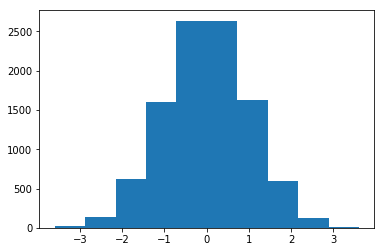

In [80]:
import matplotlib.pyplot as plt
%matplotlib inline

data = normal(size=10000)
ax = plt.hist(data)

# Computing histograms as matrices

- The function `histogram()` in the `numpy` module will count frequencies into bins and return the result as a 2-dimensional array.

In [81]:
import numpy as np
np.histogram(data)

(array([  23,  136,  618, 1597, 2626, 2635, 1620,  599,  130,   16]),
 array([-3.59780883, -2.87679609, -2.15578336, -1.43477063, -0.71375789,
         0.00725484,  0.72826758,  1.44928031,  2.17029304,  2.89130578,
         3.61231851]))

# Summary statistics

- We can compute the summary statistics of a sample of values using the numpy functions `mean()` and `var()` to compute the sample mean $\bar{X}$ and sample [variance](https://en.wikipedia.org/wiki/Variance) $\sigma_{X}^2$ .


In [82]:
np.mean(data)

-0.00045461080333497925

In [83]:
np.var(data)

1.0016048722546331

- These functions also have an `axis` parameter to compute mean and variances of columns or rows of a multi-dimensional data-set.

# Summary statistics with `nan` values

- If the data contains `nan` values, then the summary statistics will also be `nan`.



In [84]:
from numpy import nan
import numpy as np
data = np.array([1, 2, 3, 4, nan])
np.mean(data)

nan

- To omit `nan` values from the calculation, use the functions `nanmean()` and `nanvar()`:

In [85]:
np.nanmean(data)

2.5

# Discrete random numbers

- The `randint()` function in `numpy.random` can be used to draw from a uniform discrete probability distribution.

- It takes two parameters: the low value (inclusive), and the high value (exclusive).

- So to simulate one roll of a die, we would use the following Python code.


In [86]:
die_roll = randint(0, 6) + 1
die_roll

4

- Just as with the `normal()` function, we can generate an entire sequence of values.

- To simulate a [Bernoulli process](https://en.wikipedia.org/wiki/Bernoulli_process) with $n=20$ trials:

In [87]:
bernoulli_trials = randint(0, 2, size = 20)
bernoulli_trials

array([1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0])

### Acknowledgements

The earlier sections of this notebook were adapted from [an article on floating-point numbers](http://steve.hollasch.net/cgindex/coding/ieeefloat.html) written by [Steve Hollasch](http://steve.hollasch.net/).